In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
purch_data = pd.read_csv('QVI_purchase_behaviour.csv')
trans_data = pd.read_csv('QVI_transaction_data.csv')

In [4]:
# inspect the purchase data
print(purch_data.head(), '\n\n')
print(purch_data.describe(),'\n\n')
print(purch_data.columns,'\n\n')
print(purch_data.isnull().sum())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream 


       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06 


Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object') 


LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [5]:
# inspect the transaction data
print(trans_data.head(), '\n\n')
print(trans_data.describe(), '\n\n')
print(trans_data.columns, '\n\n')
print(trans_data.isnull().sum())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   


                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+

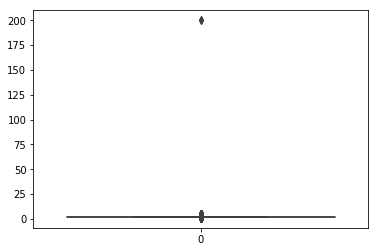

In [6]:
# check out outliers
# plot as boxplot
ax = sns.boxplot(data = trans_data['PROD_QTY'])

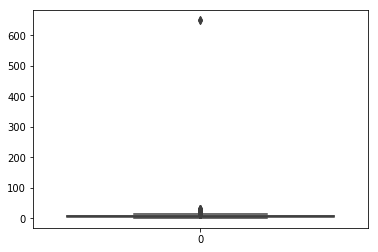

In [7]:
# view boxplot of values
# ax = sns.boxplot(data = trans_data['PROD_QTY'])
ax = sns.boxplot(data = trans_data['TOT_SALES'])

In [8]:
# replace outliers with mean
pqty_mean = trans_data['PROD_QTY'].mean()
tots_mean = trans_data['TOT_SALES'].mean()

trans_data['PROD_QTY'] = np.where(trans_data['PROD_QTY']>100, pqty_mean, trans_data['PROD_QTY'])
trans_data['TOT_SALES'] = np.where(trans_data['TOT_SALES']>100, tots_mean, trans_data['TOT_SALES'])

trans_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.905813,7.299346
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.343435,2.527231
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [9]:
# view frequency of chip type in data (top 10)
trans_data['PROD_NAME'].value_counts().head(10)

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
Kettle 135g Swt Pot Sea Salt                3257
Tostitos Splash Of  Lime 175g               3252
Infuzions Thai SweetChili PotatoMix 110g    3242
Smiths Crnkle Chip  Orgnl Big Bag 380g      3233
Thins Potato Chips  Hot & Spicy 175g        3229
Name: PROD_NAME, dtype: int64

In [10]:
#  see the total saless by chip type to find best selling chips (top 10)
chip_sales = trans_data.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(10)
chip_sales.reset_index()

,PROD_NAME,TOT_SALES
0,Dorito Corn Chp Supreme 380g,39066.608399
1,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.600000
2,Smiths Crinkle Chips Salt & Vinegar 330g,34804.200000
3,Kettle Mozzarella Basil & Pesto 175g,34457.400000
4,Smiths Crinkle Original 330g,34302.600000
5,Cheezels Cheese 330g,34296.900000
6,Doritos Cheese Supreme 330g,33390.600000
7,Kettle Sweet Chilli And Sour Cream 175g,33031.800000
8,Kettle Original 175g,32740.200000
9,Kettle Sea Salt And Vinegar 175g,32589.000000


In [11]:
# investigate transactions timeseries - first convert date integer to string
# import xlrd
# trans_data['DATE'] = trans_data['DATE'].fillna(td_mean).apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
trans_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2.0,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3.0,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1.0,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1.0,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1.0,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1.0,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2.0,7.2


In [12]:
# sum sales by date
sale_by_date = trans_data.groupby('DATE')['TOT_SALES'].sum().reset_index()

In [13]:
# plot sales profile over the year
plt.figure(figsize=(30,6))
start_date = '2017-12-31' 
end_date = '2018-12-31'

mask = (sale_by_date['DATE'] > start_date) & (sale_by_date['DATE'] <= end_date)

date_range = sale_by_date.loc[mask].sort_values(by ='DATE', ascending=True)

sns.lineplot(x = 'DATE', y='TOT_SALES', data = date_range) 
plt.show()

# this shows that there are far more sales in December than the rest of the year
#  also there is a large dip in the August (let's investigate this further)

TypeError: Invalid comparison between dtype=int64 and str

<Figure size 2160x432 with 0 Axes>

In [ ]:
# plot sales profile over the year
plt.figure(figsize=(30,6))
start_date_2 = '2018-07-31' 
end_date_2 = '2018-08-31'

mask_2 = (sale_by_date['DATE'] > start_date_2) & (sale_by_date['DATE'] <= end_date_2)

date_range_2 = sale_by_date.loc[mask_2].sort_values(by ='DATE', ascending=True)

sns.lineplot(x = 'DATE', y='TOT_SALES', data = date_range_2) 
plt.show()


In [ ]:
# parse pack sizes from string data
# pack grammage is given by the last four characters in PROD_NAME followed by'g'
grammage = trans_data['PROD_NAME'].str.strip().str[-4:-1]

grammage = pd.to_numeric(grammage, errors='coerce').dropna()

grammage.head(10)

In [ ]:
# plot boxplot to visualise packet sizes
ax = sns.boxplot(data=grammage)
ax.set(xlabel='chips', ylabel='grams')

# most packets sit within 150g - 180g range 

In [ ]:
# find most popular brands
trans_data['PROD_NAME'].value_counts()
trans_data['brand_name'] = trans_data['PROD_NAME'].str.split(' ').str[0]
trans_data.head()

In [ ]:
# plot most popular brands
brand_sales = trans_data.groupby('brand_name')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(30,6))
ax = sns.barplot(x='brand_name',y= 'TOT_SALES', data = brand_sales)
plt.show()

In [ ]:
# both transactions and purchase behaviours data have consistent column LYLTY_CARD_NBR
merge_data = pd.merge(trans_data, purch_data, on='LYLTY_CARD_NBR')
merge_data.head()

In [ ]:
# check for null data
merge_data.isnull().sum()

# no nulls so merge has been succesful

In [ ]:
# Data Analysis
# define key metrics (problem definition)
# Who spends the most on chips?
# How many customers are in each segment
# How many chips are bought per customer by segment
# What's the average chip price by customer segment


In [ ]:
# start by understanding customers by lifestage and how premier their general purchasing behaviour is
# how many customers in each segment
cust_seg = merge_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count()
cust_seg

# total customers = total in original dataset

In [ ]:
# plot number of customers in each catgeory
plt.ylabel('Number of Customers')
cust_seg.sort_values(ascending=False).plot.bar()

In [ ]:
# total sales by customers by purchasing behaviour & lifestage
prem_by_ls = merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
prem_by_ls

In [ ]:
# plot total sales by lifestage and purchasing behaviour
plt.ylabel('Total Sales')
prem_by_ls.sort_values(ascending=False).plot.bar()

In [ ]:
# how many chips are bought per customer by segment
av_chips = merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].mean()

In [ ]:
# plot average chips bought by customer in lifestyle and purchasing behaviour
av_chips.sort_values(ascending=False).plot.bar()

In [ ]:
# calculate cost of chips for each transaction
merge_data['price_per_unit'] = merge_data['TOT_SALES']/merge_data['PROD_QTY']

In [ ]:
# calculate average chip price by purchasing beviour and lifestage
av_chip_price = merge_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['price_per_unit'].mean()

In [ ]:
# plot average chip price by purchasing behaiour and lifestage
plt.ylabel('Average Price of Chips Purchased')
av_chip_price.sort_values(ascending=False).plot.bar()

In [ ]:
# Key insights:

# - highest sales period is during December
# - top three popular brands is Kettle Chips, Smiths and Doritos
# - older families with budget purchasing behaviour represent the highest proportion of customers
# - older families with budget purhcasing behaviour contribute the highest proportion of total sales
# - older families with mainstream purchasing behaviour buy the most chips on average
# - young singles/couples with mainstream purchasing behaviour buy the chips with the highest price on average
